In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250
import matplotlib 
from matplotlib import pylab as plt

In [2]:
import os

cwd = os.getcwd()
dirct = os.path.abspath(os.path.join(cwd,os.pardir))

In [3]:
df = pd.read_csv(dirct +'/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Exclude Customer ID
df = df.loc[:, df.columns != 'customerID'] 

In [4]:
# number of rows
print(df.shape[0]) 

# number of columns
print(df.shape[1]) 

7043
20


In [5]:
# Missing Values 

## Change the type of Feature TotalCharges
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
print(df['TotalCharges'].describe())

print(df.isnull().sum())

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# Exploratory Data Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


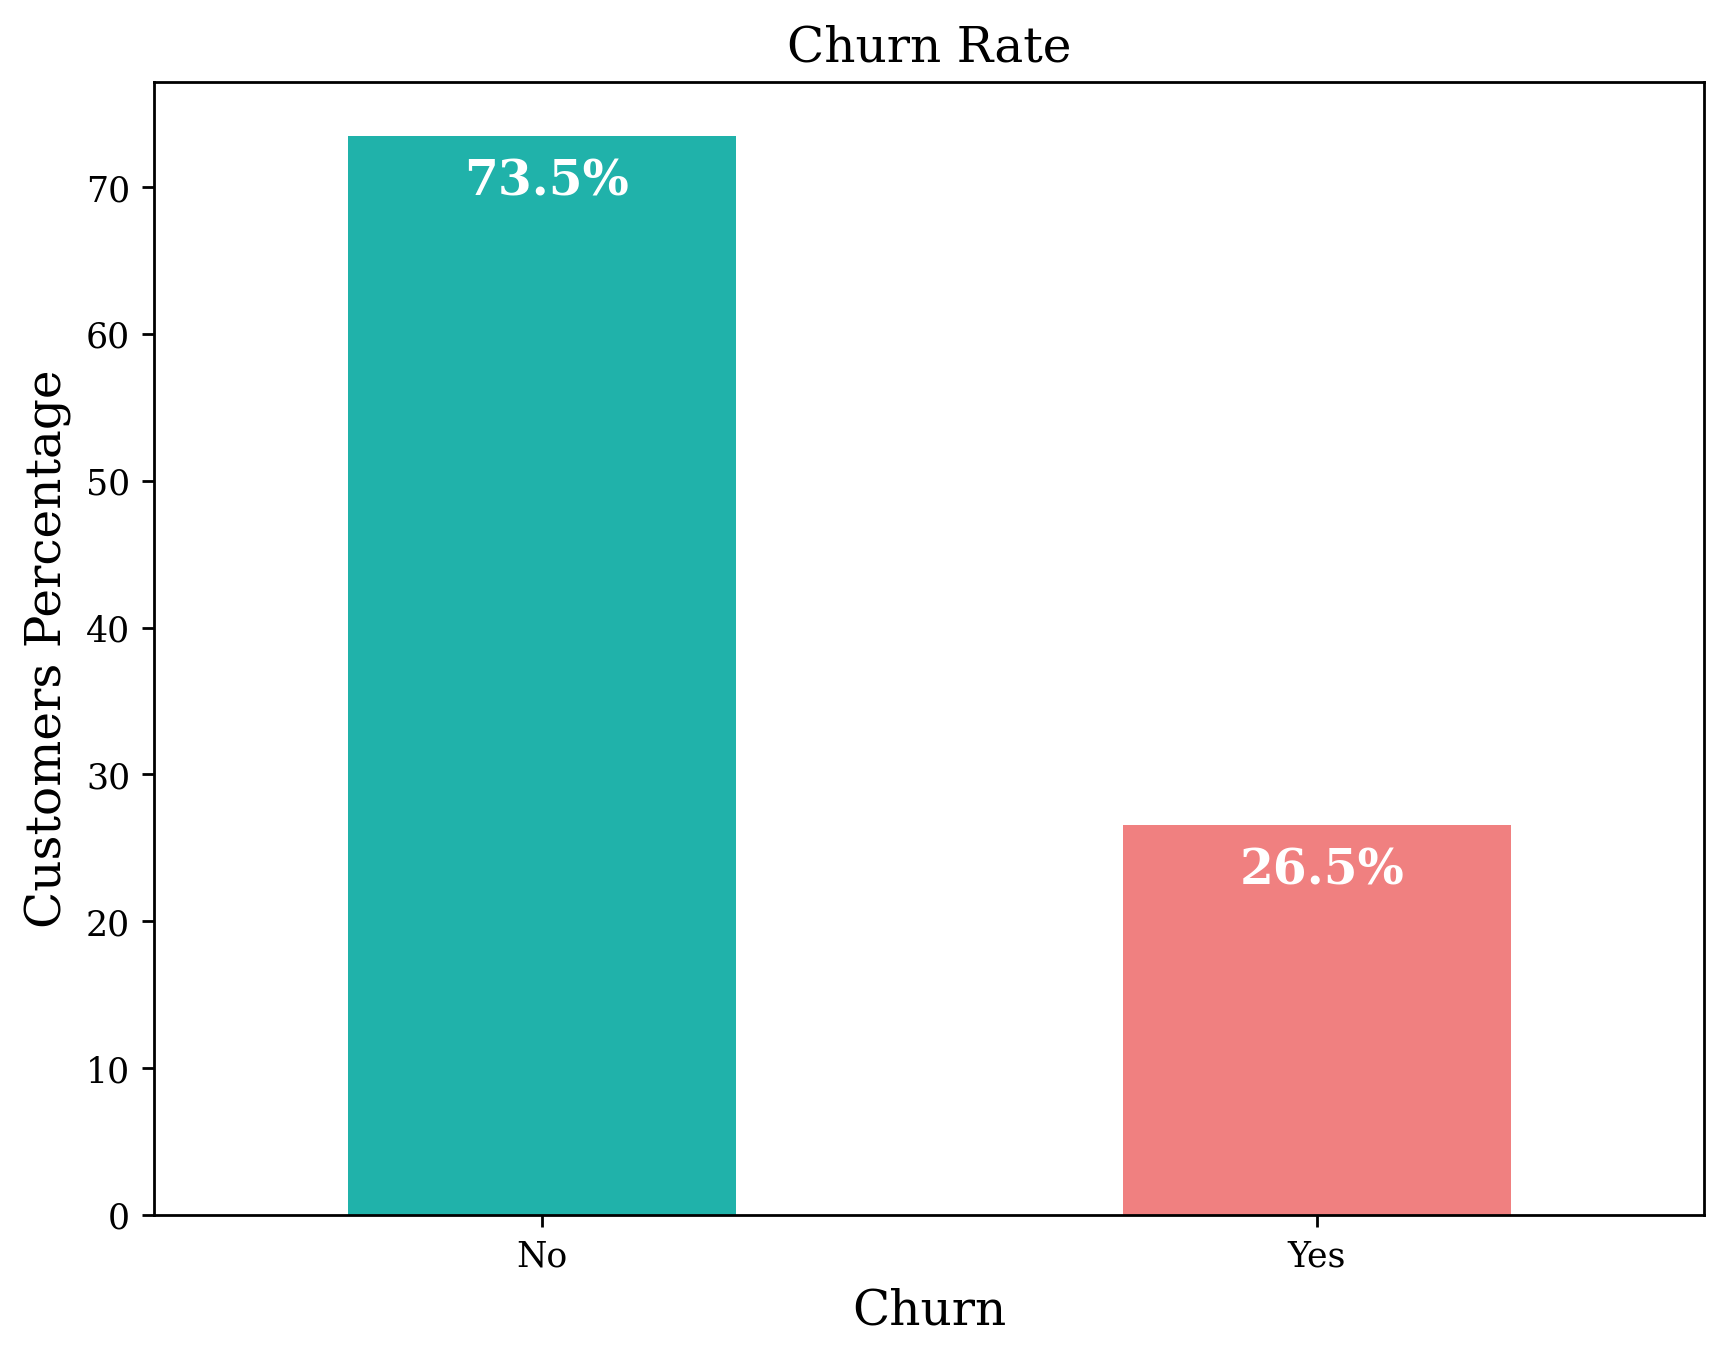

In [27]:
# Target Variable 


print(df['Churn'].value_counts())


fig = plt.figure()
colors = ['lightseagreen','lightcoral']
plt.rcParams["font.family"] = 'serif'
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0, color = colors, figsize = (8,6))

ax.set_ylabel('Customers Percentage',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)


totals = []


for i in ax.patches:
    totals.append(i.get_width())


total = sum(totals)

for i in ax.patches:

    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

    
plt.savefig(dirct +'/figures/Churn_Rate.png', bbox_inches='tight')

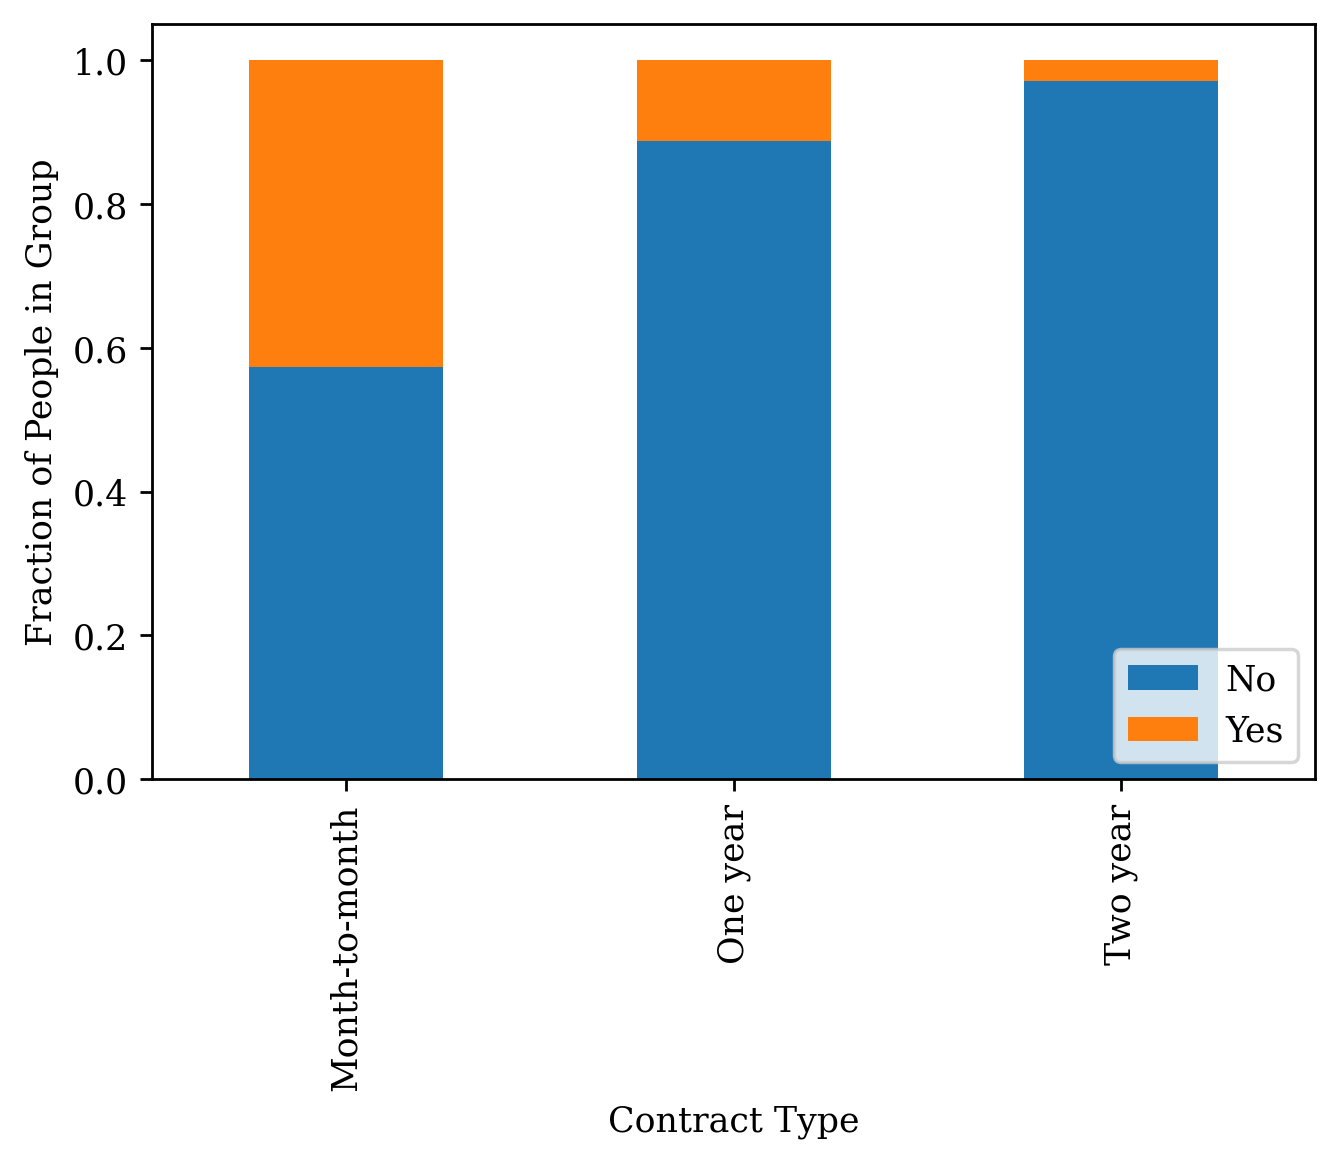

In [28]:
# Churn by Contract Type

count_matrix = df.groupby(['Contract','Churn']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of People in Group')
plt.xlabel('Contract Type')
plt.legend(loc=4)
plt.savefig(dirct +'/figures/ContractType_Churn.png', bbox_inches='tight')
plt.show()

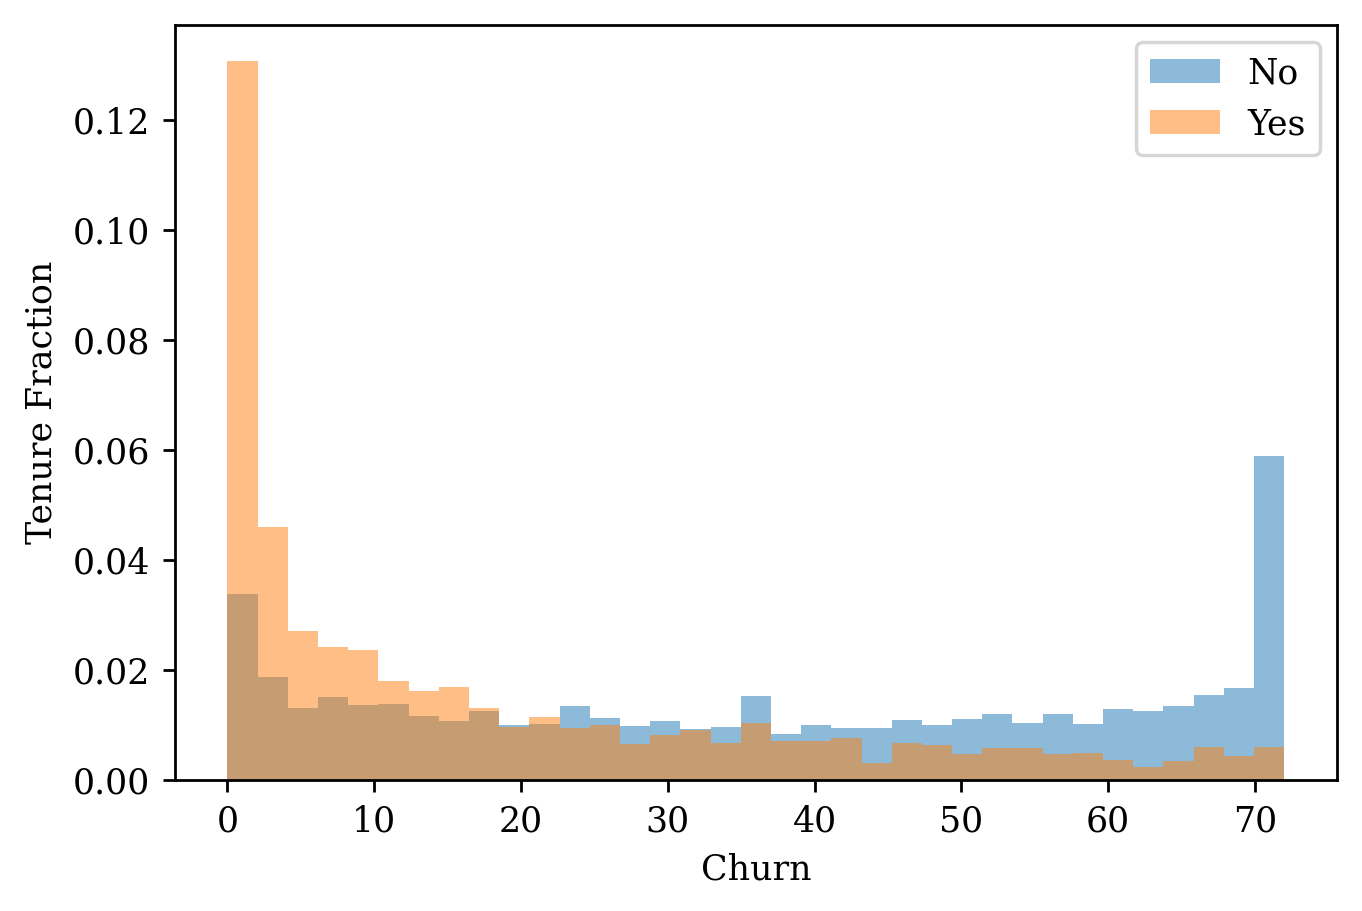

In [29]:
df['tenure'].describe()

categories = df['Churn'].unique()
bin_range = (df['tenure'].min(),df['tenure'].max())

for c in categories:
    plt.hist(df[df['Churn']==c]['tenure'],alpha=0.5,label=c,range=bin_range,bins=35,density=True)
plt.legend()
plt.ylabel('Tenure Fraction')
plt.xlabel('Churn')
plt.savefig(dirct +'/figures/tenure_Churn.png', bbox_inches='tight')
plt.show()

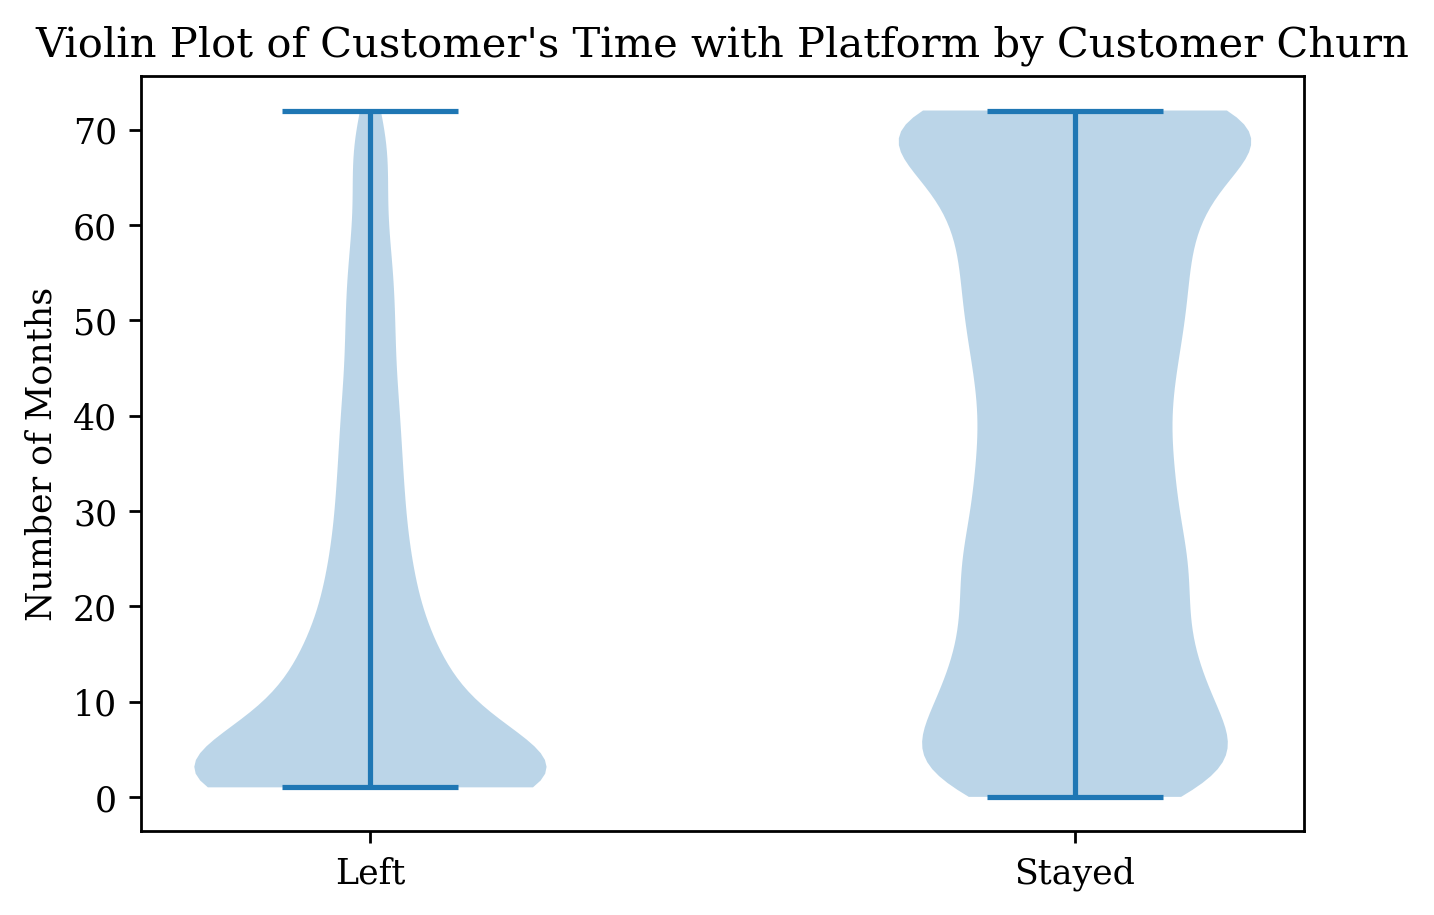

In [30]:
dataset = [df[df['Churn']=='Yes']['tenure'].values,
           df[df['Churn']=='No']['tenure'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Left','Stayed'])
plt.ylabel('Number of Months')
plt.title("Violin Plot of Customer's Time with Platform by Customer Churn")
plt.savefig(dirct +'/figures/Violin_tenure_Churn.png', bbox_inches='tight')
plt.show()

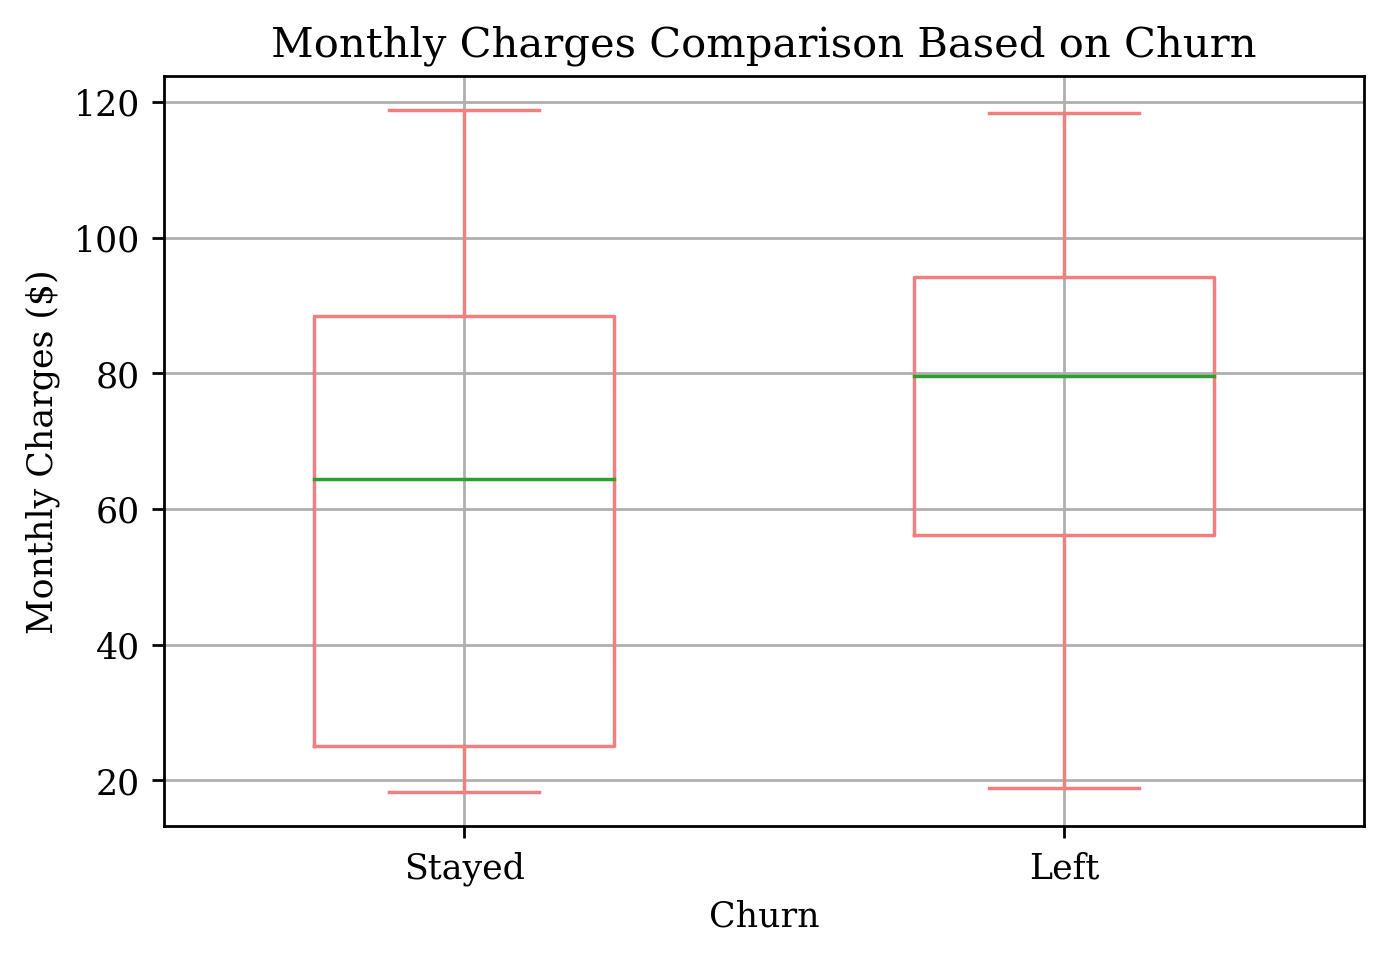

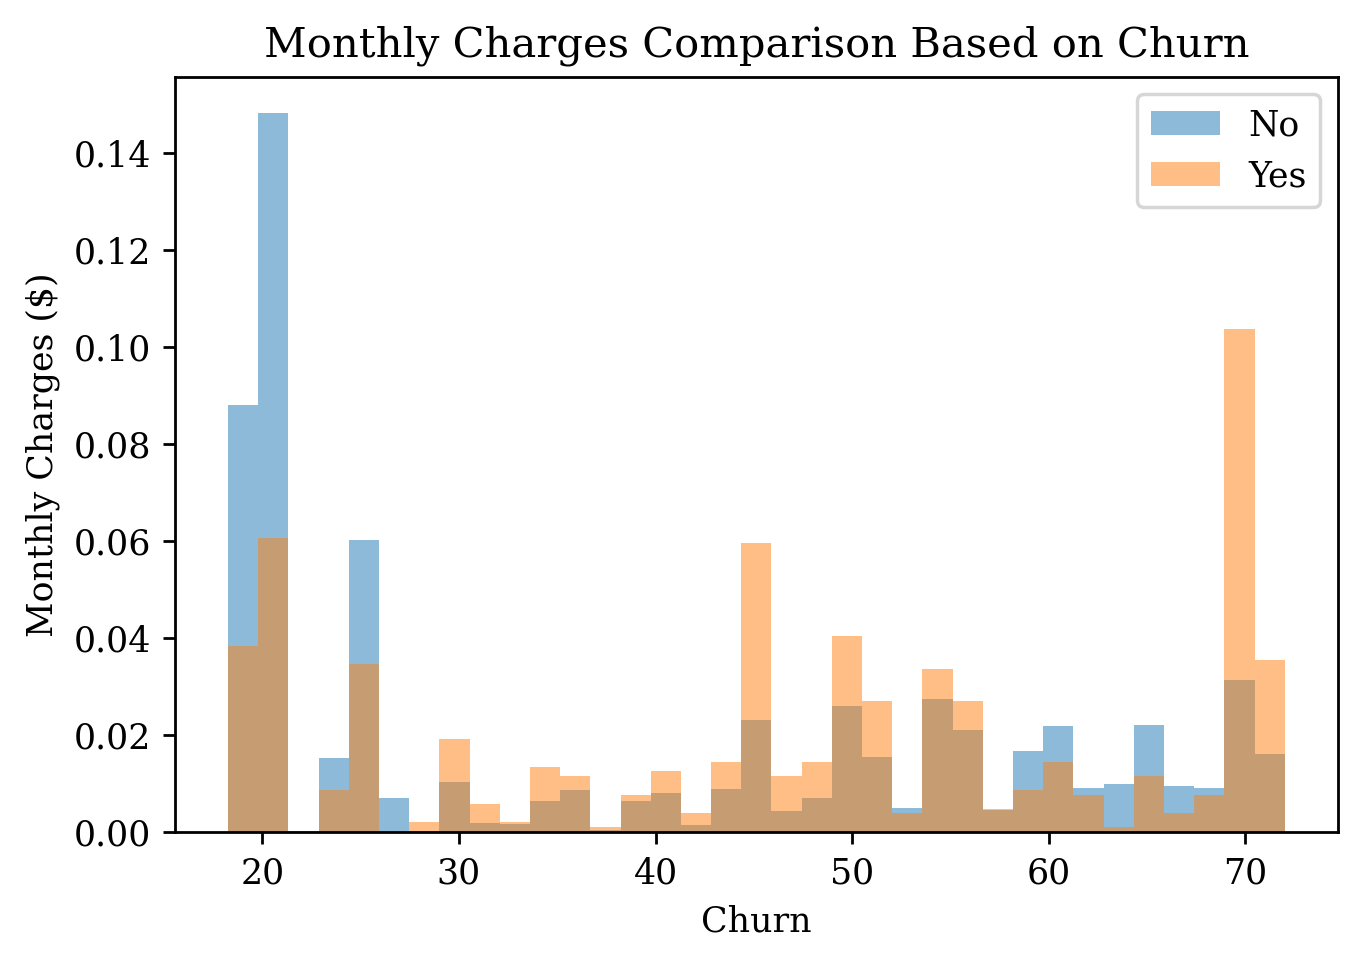

In [31]:
df['MonthlyCharges'].describe()

df[['MonthlyCharges','Churn']].boxplot(by='Churn',widths=(0.5,0.5),
                                       boxprops=dict(color=colors[1]), capprops=dict(color=colors[1]),whiskerprops=dict(color=colors[1]))
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Churn')
plt.xticks([1,2],['Stayed','Left'])
plt.suptitle('') 
plt.title('Monthly Charges Comparison Based on Churn')
plt.savefig(dirct +'/figures/boxplot_MonthlyCharges_Churn.png', bbox_inches='tight')
plt.show()



categories = df['Churn'].unique()
bin_range = (df['MonthlyCharges'].min(),df['tenure'].max())

for c in categories:
    plt.hist(df[df['Churn']==c]['MonthlyCharges'],alpha=0.5,label=c,range=bin_range,bins=35,density=True)
plt.legend()
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Churn')
plt.suptitle('') 
plt.title('Monthly Charges Comparison Based on Churn')
plt.savefig(dirct +'/figures/hstgm_MonthlyCharges_Churn.png', bbox_inches='tight')
plt.show()

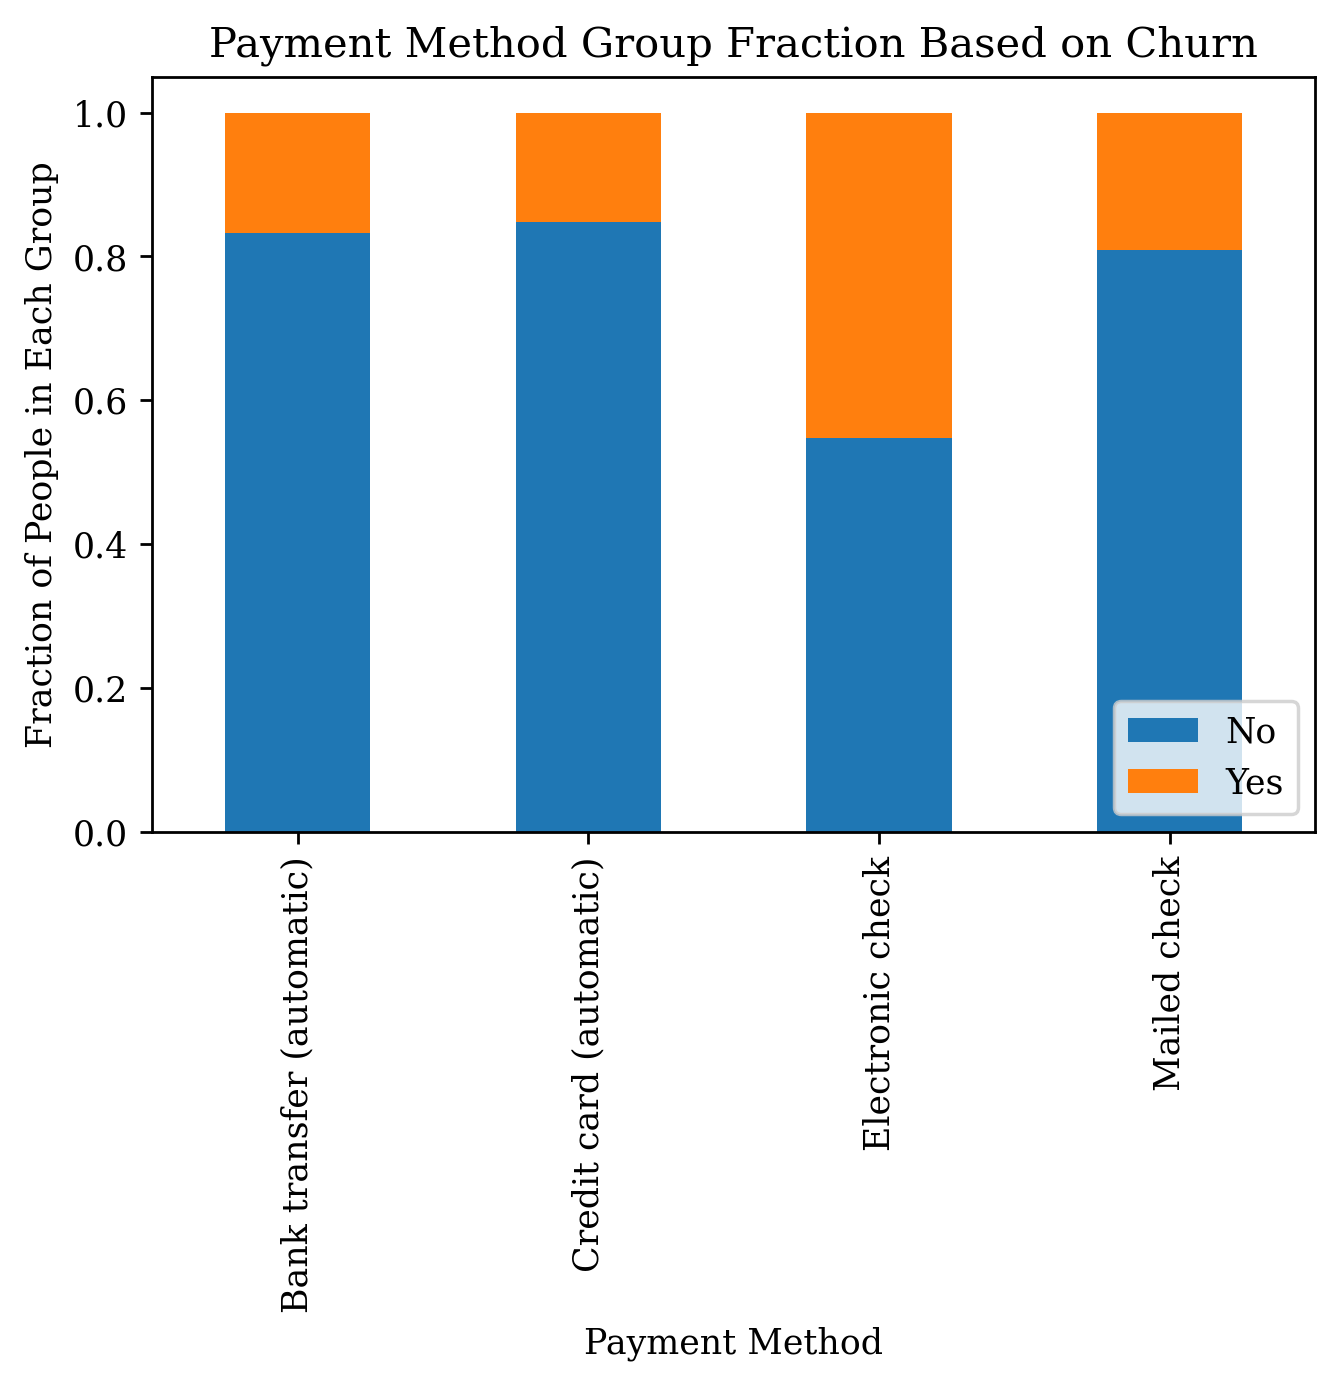

In [32]:
# Churn by Payment Method 

count_matrix = df.groupby(['PaymentMethod','Churn']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of People in Each Group')
plt.xlabel('Payment Method')
plt.title('Payment Method Group Fraction Based on Churn')
plt.legend(loc=4)
plt.savefig(dirct +'/figures/paymentMethod_Churn.png', bbox_inches='tight')
plt.show()

In [ ]:
# If the feature is categorical, make bar graph, and print out values counts in percentage and numbers
# If the feature is continuous/ numerical, make box plot, and print out description 

for col in df.columns: 
    
    # categorical vs. continuous 
    if df[col].dtypes == "float64": 
        df[['Churn',col]].boxplot(by='Churn')
        plt.ylabel(col)
        plt.suptitle('') 
        plt.title(col + ' Grouped by Churn Category')
        plt.show()
        print(df[col].describe())
        df[col].plot.hist(bins = int(np.sqrt(df.shape[0])))
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    
    # categorical vs. categorical 
    elif df[col].dtypes == "object":
        count_matrix = df.groupby(['Churn', col]).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
        count_matrix_norm.plot(kind='bar', stacked=True)
        plt.ylabel('fraction of people in group')
        plt.legend(loc=4)
        plt.show()
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True))
        
    # categorical vs. cateogrical 
    elif (df[col].dtypes == "int64") & (len(df[col].value_counts()) <= 15):
        count_matrix = df.groupby(['Churn', col]).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
        count_matrix_norm.plot(kind='bar', stacked=True)
        plt.ylabel('fraction of people in group')
        plt.legend(loc=4)
        plt.show()
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True))
    
    # cateogrical vs. continuous 
    elif (df[col].dtypes == "int64") & (len(df[col].value_counts()) > 15):
        df[['Churn',col]].boxplot(by='Churn')
        plt.ylabel(col)
        plt.suptitle('') 
        plt.title(col + ' Grouped by Churn Category')
        plt.show()
        print(df[col].describe())
        df[col].plot.hist(bins = int(np.sqrt(df.shape[0])))
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

In [ ]:
# Only three continuous variables for scatter matrix 

df_continuous = df[['tenure','MonthlyCharges','TotalCharges']]

pd.plotting.scatter_matrix(df_continuous, figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

In [33]:
# Missing Values 

## Change the type of Feature TotalCharges
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
print(df['TotalCharges'].describe())

print(df.isnull().sum())

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# Methods

in the ML pipeline:
create n imputed datasets
run all of them through the ML pipeline
generate n test scores
the uncertainty in the test scores is due to the uncertainty in imputation

In [13]:
# Missing Data: delete 7 rows of missing total charges variable 

df_r = df.dropna()
print(df_r.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [29]:
print(df_r.shape[0]) 

7032


In [30]:
y = df_r['Churn']
X = df_r.loc[:, df_r.columns != 'Churn']

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

In [32]:
ordinal_ftrs = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',\
               'OnlineBackup','DeviceProtection','TechSupport',\
               'StreamingTV','StreamingMovies','Contract'] 
ordinal_cats = [['No','Yes'],['No phone service','No','Yes'],['No','DSL','Fiber optic'],['No internet service','No','Yes'],\
                ['No internet service','No','Yes'],['No internet service','No','Yes'],['No internet service','No','Yes'],\
               ['No internet service','No','Yes'],['No internet service','No','Yes'],['Month-to-month','One year','Two year']]

onehot_ftrs = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PaperlessBilling','PaymentMethod']

std_ftrs = ['tenure','MonthlyCharges','TotalCharges']

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

In [89]:
prep = Pipeline(steps=[('preprocessor', preprocessor)])

In [39]:
def MLpipe_Stratify_accuracy_fbeta(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function stratified-splits the data to training/validation/test (60/20/20)
    The f1 score as metric score since the dataset is imbalanced 
    '''
    
    nr_states = 10
    test_scores = np.zeros(nr_states)
    final_models = []
    
    
    for i in range(nr_states):
        
        print('randoms state '+str(i+1))
        
        # X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6, stratify = y, random_state= 22*i)
        # X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5, stratify = y_other, random_state = 22*i)
        
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify = y, random_state=22*i)

        # splitter for other
        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state= 22*i)
        
        try: 
            ML = ML_algo(random_state = 22*i)
        except: 
            ML = ML_algo()
        

        pipe = make_pipeline(preprocessor, ML)
        
        grid = GridSearchCV(pipe, param_grid=param_grid, scoring='f1_macro',
                        return_train_score = True, n_jobs=-1, verbose=True)
        
        
        grid.fit(X_other, y_other)
        
        results = pd.DataFrame(grid.cv_results_)
        
        print('best model parameters:',grid.best_params_)
        print('validation f1 score:', grid.best_score_) 
        
        
        final_models.append(grid)
   
        # calculate and save the test score
    
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[i] = f1_score(y_test, y_test_pred, average='macro')
        
        print('test f1 score:',test_scores[i])
        
        
    return test_scores, final_models

In [40]:
# Logistic Regression l1 

alpha = np.logspace(-4, 4, 21)
C = [1/i for i in alpha]


from sklearn.linear_model import LogisticRegression

params = { 'logisticregression__penalty' : ['l1'], 
          'logisticregression__C' : C, 
         'logisticregression__max_iter': [100000],
         'logisticregression__solver': ['saga'] } 

logistic_l1_test, logistic_l1_model = MLpipe_Stratify_accuracy_fbeta(X, y, preprocessor, LogisticRegression, params)

randoms state 1
Fitting 5 folds for each of 21 candidates, totalling 105 fits
best model parameters: {'logisticregression__C': 15.848931924611126, 'logisticregression__max_iter': 100000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
validation f1 score: 0.7332520234629741
test f1 score: 0.7406672792196002
randoms state 2
Fitting 5 folds for each of 21 candidates, totalling 105 fits
best model parameters: {'logisticregression__C': 10000.0, 'logisticregression__max_iter': 100000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
validation f1 score: 0.7344504914655042
test f1 score: 0.7300649316918603
randoms state 3
Fitting 5 folds for each of 21 candidates, totalling 105 fits
best model parameters: {'logisticregression__C': 100.0, 'logisticregression__max_iter': 100000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
validation f1 score: 0.7322320364239456
test f1 score: 0.7408691676034065
randoms state 4


In [43]:
# Logistic Regression l2 

alpha = np.logspace(-4, 4, 21)
C = [1/i for i in alpha]

params = { 'logisticregression__penalty' : ['l2'], 
          'logisticregression__C' : C, 
         'logisticregression__max_iter': [100000],
         'logisticregression__solver': ['saga'] } 

logistic_l2_test, logistic_l2_model = MLpipe_Stratify_accuracy_fbeta(X, y, preprocessor, LogisticRegression, params)

randoms state 1
Fitting 5 folds for each of 21 candidates, totalling 105 fits
best model parameters: {'logisticregression__C': 15.848931924611126, 'logisticregression__max_iter': 100000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
validation f1 score: 0.7334280788020301
test f1 score: 0.7406672792196002
randoms state 2
Fitting 5 folds for each of 21 candidates, totalling 105 fits
best model parameters: {'logisticregression__C': 6.30957344480193, 'logisticregression__max_iter': 100000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
validation f1 score: 0.7346285344892578
test f1 score: 0.7300649316918603
randoms state 3
Fitting 5 folds for each of 21 candidates, totalling 105 fits
best model parameters: {'logisticregression__C': 100.0, 'logisticregression__max_iter': 100000, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
validation f1 score: 0.7322320364239456
test f1 score: 0.7408691676034065
randoms

In [48]:
# Logistic Regression Elastic Net 

alpha = np.logspace(-4, 4, 11)
C = [1/i for i in alpha]

params = { 'logisticregression__penalty' : ['elasticnet'], 
          'logisticregression__C' : C,
         'logisticregression__l1_ratio': np.linspace(0.01,0.99,11), 
         'logisticregression__max_iter': [100000],
         'logisticregression__solver': ['saga'] } 

logistic_EN_test, logistic_EN_model = MLpipe_Stratify_accuracy_fbeta(X, y, preprocessor, LogisticRegression, params)

randoms state 1
Fitting 5 folds for each of 121 candidates, totalling 605 fits
best model parameters: {'logisticregression__C': 39.81071705534969, 'logisticregression__l1_ratio': 0.794, 'logisticregression__max_iter': 100000, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
validation f1 score: 0.7332520234629741
test f1 score: 0.7406672792196002
randoms state 2
Fitting 5 folds for each of 121 candidates, totalling 605 fits
best model parameters: {'logisticregression__C': 0.1584893192461111, 'logisticregression__l1_ratio': 0.794, 'logisticregression__max_iter': 100000, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
validation f1 score: 0.7349598131305545
test f1 score: 0.7256097434021819
randoms state 3
Fitting 5 folds for each of 121 candidates, totalling 605 fits
best model parameters: {'logisticregression__C': 39.81071705534969, 'logisticregression__l1_ratio': 0.01, 'logisticregression__max_iter': 100000, 'logisti

In [49]:
# SVC

from sklearn.svm import SVC

alpha = np.logspace(-4, 4, 11)
C = [1/i for i in alpha]

# SVC gamma: 1e-2, 1e-1, 1e0, 1e1, 1e2, auto, scale; C: 0.1, 0.31, 1, 3.1, 10

params = { 
         'svc__gamma' : ['scale', 'auto'] ,
         'svc__C' : C }


SVC_test, SVC_model = MLpipe_Stratify_accuracy_fbeta(X, y, preprocessor, SVC, params)

randoms state 1
Fitting 5 folds for each of 22 candidates, totalling 110 fits
best model parameters: {'svc__C': 39.81071705534969, 'svc__gamma': 'auto'}
validation f1 score: 0.7164026179136249
test f1 score: 0.7211179068977234
randoms state 2
Fitting 5 folds for each of 22 candidates, totalling 110 fits
best model parameters: {'svc__C': 39.81071705534969, 'svc__gamma': 'auto'}
validation f1 score: 0.714460353641312
test f1 score: 0.712172114143463
randoms state 3
Fitting 5 folds for each of 22 candidates, totalling 110 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 'scale'}
validation f1 score: 0.7090473658625673
test f1 score: 0.722865790908333
randoms state 4
Fitting 5 folds for each of 22 candidates, totalling 110 fits
best model parameters: {'svc__C': 6.30957344480193, 'svc__gamma': 'auto'}
validation f1 score: 0.7175414102607467
test f1 score: 0.7095445152121619
randoms state 5
Fitting 5 folds for each of 22 candidates, totalling 110 fits
best model parameters: {'svc__C

In [64]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

params = { 
         'randomforestclassifier__max_depth': [1, 3, 5, 10, 20], 
         'randomforestclassifier__max_features': [0.25, 0.5, 0.75, 1.0],
         'randomforestclassifier__min_samples_split': [2, 5, 10] }


RF_test, RF_model = MLpipe_Stratify_accuracy_fbeta(X, y, preprocessor, RandomForestClassifier, params)

randoms state 1
Fitting 5 folds for each of 60 candidates, totalling 300 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.25, 'randomforestclassifier__min_samples_split': 5}
validation f1 score: 0.7235799709005737
test f1 score: 0.7224096538898062
randoms state 2
Fitting 5 folds for each of 60 candidates, totalling 300 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 10}
validation f1 score: 0.7139547534480646
test f1 score: 0.7260359659327169
randoms state 3
Fitting 5 folds for each of 60 candidates, totalling 300 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__min_samples_split': 5}
validation f1 score: 0.7179253859663443
test f1 score: 0.7239010989010989
randoms state 4
Fitting 5 folds for each of 60 candidates, totalling

In [110]:
y = pd.DataFrame(data=df_r['Churn'])
X = df_r.loc[:, df_r.columns != 'Churn']
y



,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [112]:
y['Churn'] = df['Churn'].map(dict(Yes=1, No=0))
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [129]:
# Xgboost  
from sklearn.model_selection import ParameterGrid
import xgboost

param_grid = {
      "learning_rate": [0.01],
      "n_estimators": [1000],
      "seed": [0],
      "gamma": [0, 0.1, 0.2,0.3, 0.4],
      "max_depth": [1,3,5,10,30],
      "colsample_bytree": [0.9],              
      "subsample": [0.5, 0.66, 0.75, 1], 
      "min_child_weight": [1, 3, 5, 7],
      "eval_metric": ['logloss'] 
       }

nr_states = 1

# 10


test_scores = np.zeros(nr_states)
final_models = []

    
for i in range(nr_states):
        
        print('randoms state '+str(i+1))
        
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify = y, random_state=22*i)

        y_other = pd.DataFrame(data=y_other)


        kf = StratifiedKFold(n_splits=4,shuffle=True,random_state= 22*i)
        
        train_score = []
        # = np.zeros(len(ParameterGrid(param_grid)))
        val_score = []
        # = np.zeros(len(ParameterGrid(param_grid)))
        models = []
        
        kfold_params = []
        kfold_val = []
        
        kfold_models = [] 
        
        
        for train_index, test_index in kf.split(X_other, y_other):
        
            onefold_val = []

            onefold_models = []
            
            X_train , X_val = X_other.iloc[train_index,:], X_other.iloc[test_index,:]
            y_train, y_CV = y_other.iloc[train_index,:], y_other.iloc[test_index,:]
            
            X_train_prep = prep.fit_transform(X_train)
            X_val_prep = prep.transform(X_val)
            
            
            
            
            
            for p in range(len(ParameterGrid(param_grid))):
                params = ParameterGrid(param_grid)[p]
                XGB = xgboost.XGBClassifier(use_label_encoder =False)
                XGB.set_params(**ParameterGrid(param_grid)[0])
                XGB.fit(X_train_prep,y_train,early_stopping_rounds=50,eval_set=[(X_val_prep, y_CV)], verbose=False)
                
                models.append(XGB) # save it
                y_CV_pred = XGB.predict(X_val_prep)
                val_score.append(f1_score(y_CV, y_CV_pred, average='macro'))
                print('the CV macro f1:',f1_score(y_CV, y_CV_pred, average='macro'))
        
            
            kfold_params.append(ParameterGrid(param_grid)[np.argmax(val_score)])
            kfold_val.append(np.max(val_score))
            kfold_models.append(models[np.argmax(val_score)])
            
             
        
        # bestinfold_params.append(ParameterGrid(param_grid)[np.argmax(onefold_val_score)])
        
        # bestfold_val.append(np.max(onefold_val_score))
            
        
            
            
                
                # final_models.append(models[np.argmax(val_score)])
        
        print('best model parameters:',kfold_params[np.argmax(kfold_val)])
        print('corresponding validation score:',np.max(kfold_val))
        
        final_models.append(kfold_models[np.argmax(kfold_val)])
            
        X_test_prep = prep.transform(X_test)
            
        y_test_pred = final_models[-1].predict(X_test_prep)
        
        # calculate and save the test score

        test_scores[i] = f1_score(y_test, y_test_pred, average='macro')
        
        print('test f1 score:',test_scores[i])
        

randoms state 1
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro f1: 0.7506153981970218
the CV macro

KeyboardInterrupt: 

In [ ]:
# Xgboost  
from sklearn.model_selection import ParameterGrid
import xgboost

param_grid = {
      "learning_rate": [0.01],
      "n_estimators": [1000],
      "seed": [0],
      "gamma": [0, 0.1, 0.2,0.3, 0.4],
      "max_depth": [1,3,5,10,30],
      "colsample_bytree": [0.9],              
      "subsample": [0.5, 0.66, 0.75, 1], 
      "min_child_weight": [1, 3, 5, 7],
      "eval_metric": ['logloss'] 
       }

nr_states = 1

# 10


test_scores = np.zeros(nr_states)
final_models = []

    
for i in range(nr_states):
        
        print('randoms state '+str(i+1))
        
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify = y, random_state=22*i)
        X_train, X_val, y_train, y_val = train_test_split(X_other,y_other,test_size = 0.2,stratify = y, random_state=22*i)        
        
       
        train_score = np.zeros(len(ParameterGrid(param_grid)))
        val_score = np.zeros(len(ParameterGrid(param_grid)))
        models = []
        
        X_train_prep = prep.fit_transform(X_train)
        X_val_prep = prep.transform(X_val)
        
        for p in range(len(ParameterGrid(param_grid))):
            params = ParameterGrid(param_grid)[p]
            XGB = xgboost.XGBClassifier(use_label_encoder =False)
            XGB.set_params(**ParameterGrid(param_grid)[0])
            XGB.fit(X_train_prep,y_train,early_stopping_rounds=50,eval_set=[(X_val_prep, y_CV)], verbose=False)
                
            models.append(XGB) # save it
            y_CV_pred = XGB.predict(X_val_prep)
            val_score[p]=f1_score(y_CV, y_CV_pred, average='macro')
            
        print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
        print('corresponding validation score:',np.max(val_score))
        
        final_models.append(models[np.argmax(val_score)])
            
        X_test_prep = prep.transform(X_test)
            
        y_test_pred = final_models[-1].predict(X_test_prep)
        
        # calculate and save the test score

        test_scores[i] = f1_score(y_test, y_test_pred, average='macro')
        
        
        print('test f1 score:',test_scores[i])



In [131]:
import pickle 

file = open('results/grid.save', 'wb')
pickle.dump((grid,X_test,y_test),file)
file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'results/grid.save'

In [ ]:
grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=10)

grid, X_test, y_test = ML_pipeline_kfold(X,y,42,4)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save the output so I can use it later
import pickle
file = open('results/grid.save', 'wb')
pickle.dump((grid,X_test,y_test),file)
file.close()